# Queues

Stores ordered items like a list, but its design is more restrictive. This data structure only allows items to be added to the tail of the queue, and be removed from the head

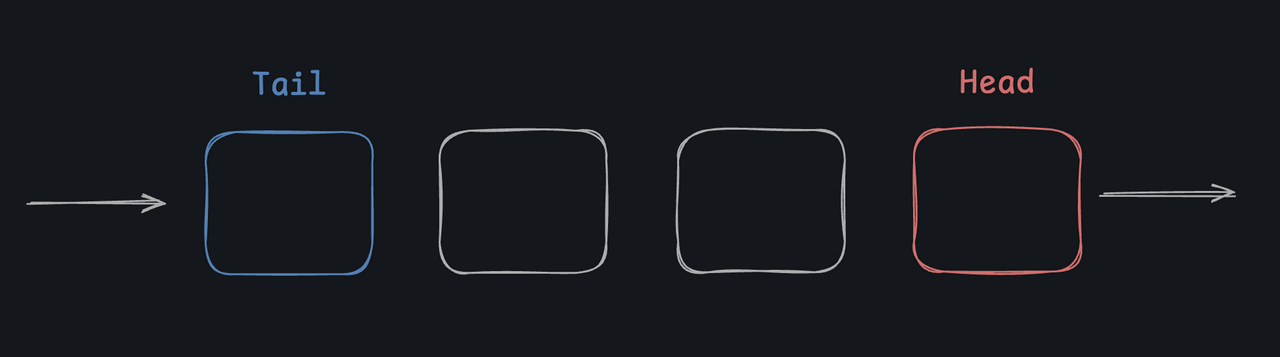

A queue has the following operations

In [8]:
class Queue:
    def __init__(self):
        self.items = []

    def push(self, item):
        self.items.append(item)

    def pop(self):
        if len(self.items) > 0: 
            temporal = self.items[0]
            del self.items[0]
            return temporal
        return None

    def peek(self):
        if len(self.items) > 0: 
            return self.items[0]
        return None
        

    def size(self):
        return len(self.items)

# Example using a variation of Queue class

In [12]:
class Queue:
    def __init__(self):
        self.items = []

    def push(self, item):
        self.items.insert(0, item)

    def pop(self):
        if len(self.items) == 0:
            return None
        temp = self.items[-1]
        del self.items[-1]
        return temp

    def peek(self):
        if len(self.items) == 0:
            return None
        return self.items[-1]

    def size(self):
        return len(self.items)

    def search_and_remove(self, item):
        if item not in self.items:
            return None
        self.items.remove(item)
        return item

    def __repr__(self):
        return f"[{', '.join(self.items)}]"

In [13]:
def matchmake(queue, user):
    #queue is an empty list
    #user is a tuple with the specified info
    action = user[1]
    name = user[0]
    
    if action == "leave":
        queue.search_and_remove(name)
    elif action == "join":
        queue.push(name)

    if queue.size() >= 4:
        user1 = queue.pop()
        user2 = queue.pop()
        return f"{user1} matched {user2}!"

    if queue.size() < 4:
        return "No match found"

In [15]:
run_cases = [
    [("Ted", "join"), (["Ted"], "No match found")],
    [("Barney", "join"), (["Barney", "Ted"], "No match found")],
    [("Marshall", "join"), (["Marshall", "Barney", "Ted"], "No match found")],
    [("Lily", "join"), (["Lily", "Marshall"], "Ted matched Barney!")],
    [("Robin", "join"), (["Robin", "Lily", "Marshall"], "No match found")],
    [("Carl", "join"), (["Carl", "Robin"], "Marshall matched Lily!")],
    [("Carl", "leave"), (["Robin"], "No match found")],
    [("Robin", "leave"), ([], "No match found")],
]

submit_cases = run_cases + [
    [("Ranjit", "join"), (["Ranjit"], "No match found")],
    [("Ranjit", "leave"), ([], "No match found")],
    [("Victoria", "join"), (["Victoria"], "No match found")],
    [("Quinn", "join"), (["Quinn", "Victoria"], "No match found")],
    [("Zoey", "join"), (["Zoey", "Quinn", "Victoria"], "No match found")],
    [("Stella", "join"), (["Stella", "Zoey"], "Victoria matched Quinn!")],
]


def test(queue, user, expected_state):
    print("---------------------------------")
    print(f"Queue: {queue}")
    name = user[0]
    action = user[1]
    if action == "leave":
        print(f"{name} left the queue.")
    if action == "join":
        print(f"{name} joined the queue.")
    print(f"Expecting Queue: {expected_state[0]}")
    print(f"Expecting Return: {expected_state[1]}")
    try:
        result = matchmake(queue, user)
    except Exception as e:
        result = f"Error: {e}"
    print(f"Actual Queue: {queue}")
    print(f"Actual Return: {result}")
    if result == expected_state[1] and queue.items == expected_state[0]:
        print("Pass")
        return True
    print("Fail")
    return False


def main():
    passed = 0
    failed = 0
    queue = Queue()
    skipped = len(submit_cases) - len(test_cases)
    for test_case in test_cases:
        correct = test(queue, *test_case)
        if correct:
            passed += 1
        else:
            failed += 1
    if failed == 0:
        print("============= PASS ==============")
    else:
        print("============= FAIL ==============")
    if skipped > 0:
        print(f"{passed} passed, {failed} failed, {skipped} skipped")
    else:
        print(f"{passed} passed, {failed} failed")


test_cases = submit_cases
if "__RUN__" in globals():
    test_cases = run_cases

main()

---------------------------------
Queue: []
Ted joined the queue.
Expecting Queue: ['Ted']
Expecting Return: No match found
Actual Queue: [Ted]
Actual Return: No match found
Pass
---------------------------------
Queue: [Ted]
Barney joined the queue.
Expecting Queue: ['Barney', 'Ted']
Expecting Return: No match found
Actual Queue: [Barney, Ted]
Actual Return: No match found
Pass
---------------------------------
Queue: [Barney, Ted]
Marshall joined the queue.
Expecting Queue: ['Marshall', 'Barney', 'Ted']
Expecting Return: No match found
Actual Queue: [Marshall, Barney, Ted]
Actual Return: No match found
Pass
---------------------------------
Queue: [Marshall, Barney, Ted]
Lily joined the queue.
Expecting Queue: ['Lily', 'Marshall']
Expecting Return: Ted matched Barney!
Actual Queue: [Lily, Marshall]
Actual Return: Ted matched Barney!
Pass
---------------------------------
Queue: [Lily, Marshall]
Robin joined the queue.
Expecting Queue: ['Robin', 'Lily', 'Marshall']
Expecting Return: N